<a href="https://colab.research.google.com/github/VasumathiBurugu/Digit-recognition/blob/master/CNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install Required Libraries**

In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [ ]:
import tensorflow as tf
print(tf.keras.__version__)


3.8.0


**Import Libraries and Load Datasets**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist, cifar10

# Load MNIST dataset
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
x_train_mnist = x_train_mnist[..., tf.newaxis] / 255.0  # Add channel dimension and normalize
x_test_mnist = x_test_mnist[..., tf.newaxis] / 255.0

# Load CIFAR-10 dataset
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()
x_train_cifar = x_train_cifar / 255.0  # Normalize
x_test_cifar = x_test_cifar / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
print(x_train_mnist.shape)
print(y_train_mnist.shape)
print(x_test_mnist.shape)
print(y_test_mnist.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [ ]:
print(x_train_cifar.shape)
print(y_train_cifar.shape)
print(x_test_cifar.shape)
print(y_test_cifar.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


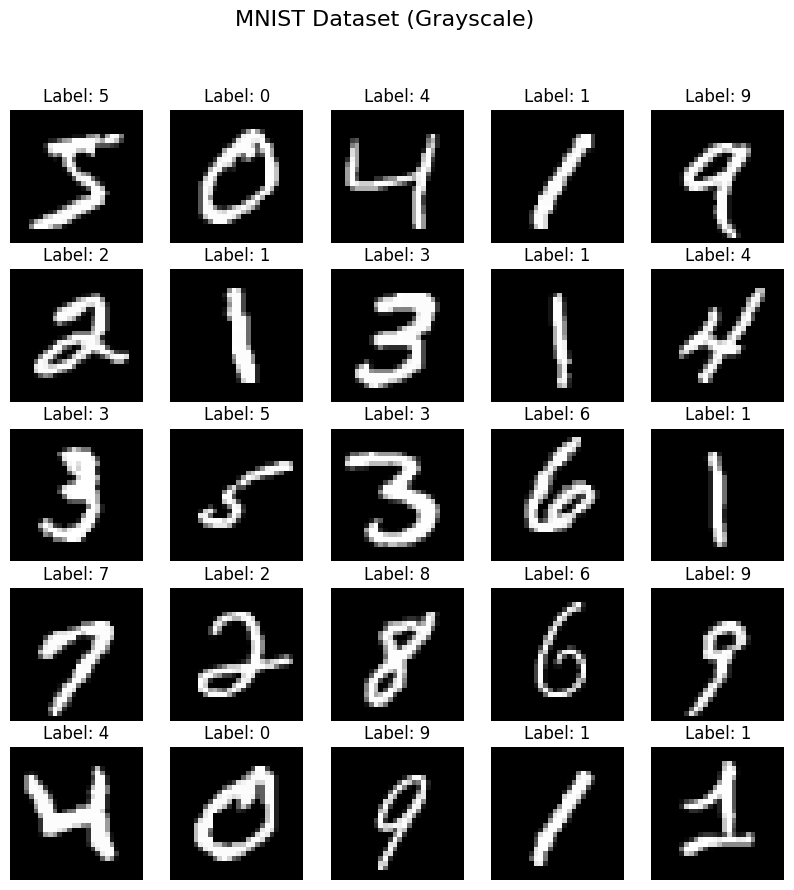

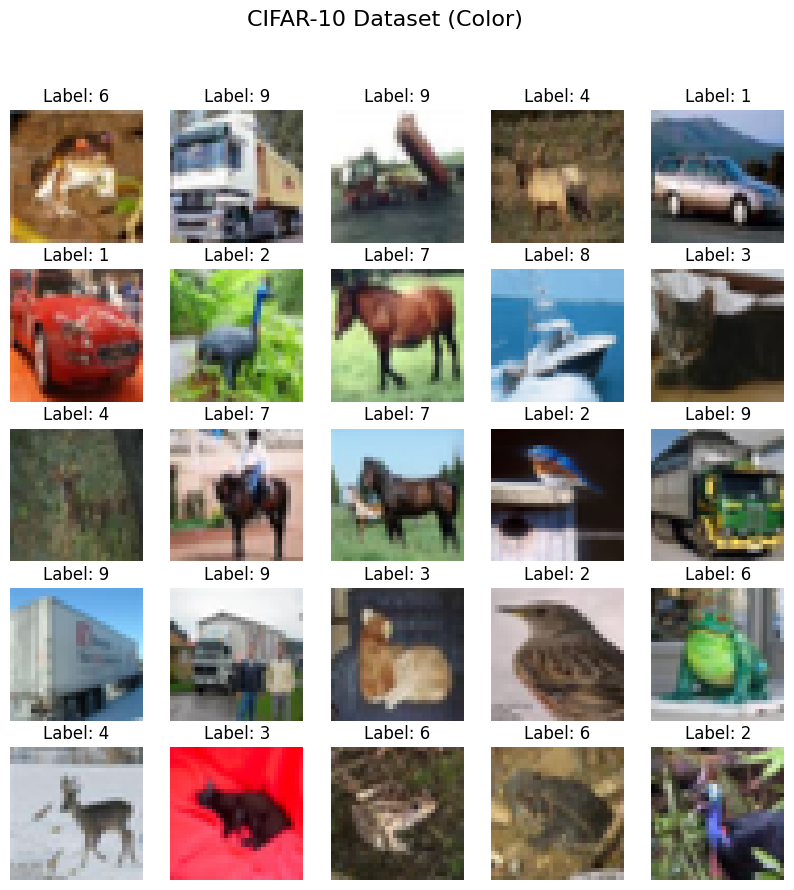

In [ ]:
import matplotlib.pyplot as plt

def display_images(dataset, labels, title, num_images=25, dataset_type="grayscale"):
    """
    Displays a grid of images from the dataset.

    Args:
    - dataset: The image dataset (e.g., x_train).
    - labels: Corresponding labels.
    - title: Title for the plot.
    - num_images: Number of images to display (default: 25).
    - dataset_type: "grayscale" or "color" for proper handling of channel dimensions.
    """
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        if dataset_type == "grayscale":
            plt.imshow(dataset[i].squeeze(), cmap="gray")  # Squeeze removes single-channel dimension.
        else:
            plt.imshow(dataset[i])
        plt.title(f"Label: {labels[i].item()}")
        plt.axis("off")
    plt.suptitle(title, fontsize=16)
    plt.show()


# Display 25 random samples from MNIST
display_images(x_train_mnist, y_train_mnist, "MNIST Dataset (Grayscale)", num_images=25, dataset_type="grayscale")

# Display 25 random samples from CIFAR-10
display_images(x_train_cifar, y_train_cifar, "CIFAR-10 Dataset (Color)", num_images=25, dataset_type="color")


**CNN model for MNIST**

In [ ]:
# Define CNN model for MNIST (simpler architecture)
from tensorflow.keras import layers, models  # Importing models here

def mnist_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),  # Regularization
        layers.Dense(10, activation='softmax')
    ])
    return model

In [ ]:
print(mnist_model)

<function mnist_model at 0x7c0a79b085e0>


In [ ]:
print(models.Sequential)

<class 'keras.src.models.sequential.Sequential'>


**Compile and train MNIST model**

In [ ]:
mnist_cnn = mnist_model()
mnist_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("Training MNIST model...")
history = mnist_cnn.fit(x_train_mnist, y_train_mnist, epochs=5, validation_data=(x_test_mnist, y_test_mnist))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training MNIST model...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 35ms/step - accuracy: 0.8608 - loss: 0.4437 - val_accuracy: 0.9860 - val_loss: 0.0421
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.9765 - loss: 0.0795 - val_accuracy: 0.9906 - val_loss: 0.0299
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 35ms/step - accuracy: 0.9830 - loss: 0.0576 - val_accuracy: 0.9903 - val_loss: 0.0298
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.9857 - loss: 0.0478 - val_accuracy: 0.9921 - val_loss: 0.0250
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.9877 - loss: 0.0401 - val_accuracy: 0.9917 - val_loss: 0.0279


In [ ]:
print(type(history.history))

<class 'dict'>


In [ ]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [ ]:
print(history.history.values())

dict_values([[0.9366833567619324, 0.9779499769210815, 0.9827166795730591, 0.9854166507720947, 0.9882833361625671], [0.20965611934661865, 0.07651142030954361, 0.058027684688568115, 0.04814472794532776, 0.039174288511276245], [0.9860000014305115, 0.9905999898910522, 0.9902999997138977, 0.9921000003814697, 0.9916999936103821], [0.04211384803056717, 0.029875580221414566, 0.029755819588899612, 0.02498731017112732, 0.027856362983584404]])


In [ ]:
mnist_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)

**Evaluate MNIST model**

In [ ]:
mnist_loss, mnist_accuracy = mnist_cnn.evaluate(x_test_mnist, y_test_mnist)
print(f"MNIST Test Accuracy: {mnist_accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9896 - loss: 0.0347
MNIST Test Accuracy: 0.99


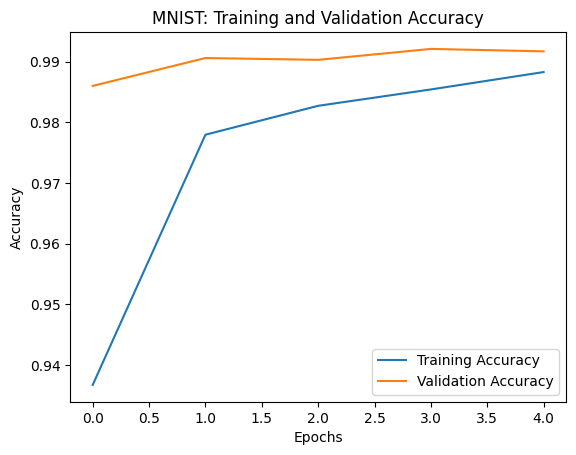

In [ ]:
import matplotlib.pyplot as plt

# Now 'history' is defined and you can access its properties
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('MNIST: Training and Validation Accuracy')
plt.show()

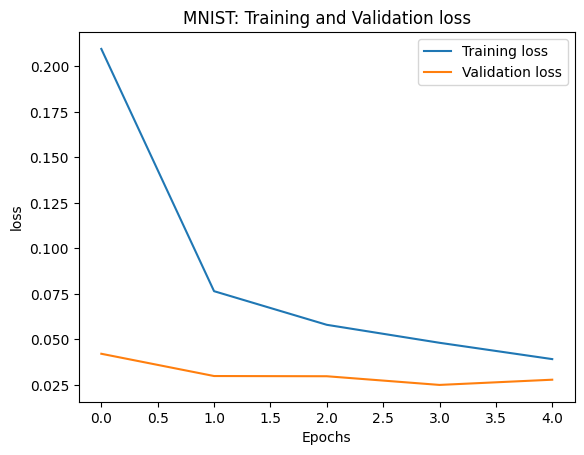

In [ ]:
import matplotlib.pyplot as plt

# Now 'history' is defined and you can access its properties
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.title('MNIST: Training and Validation loss')
plt.show()

In [ ]:
!pip install scikit-learn  # Install scikit-learn if you haven't already

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step


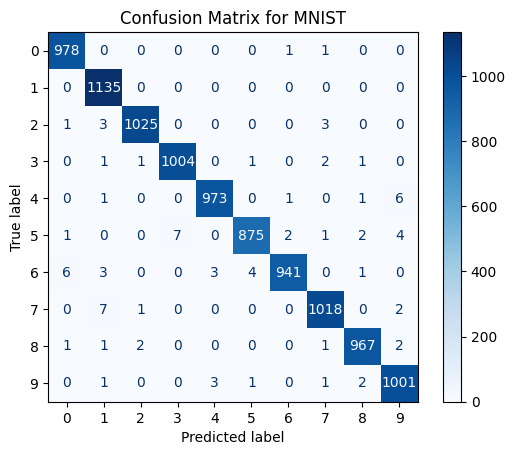

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Import necessary modules

# ... (previous code) ...

# Predict on the test set using the MNIST model (mnist_cnn)
y_pred = mnist_cnn.predict(x_test_mnist)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

# Compute confusion matrix
cm = confusion_matrix(y_test_mnist, y_pred_classes)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(10)))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for MNIST")
plt.show()

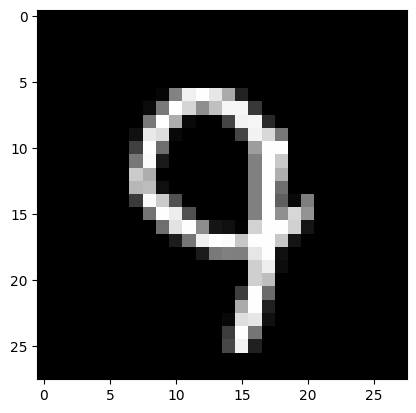

In [ ]:
plt.imshow(x_test_mnist[999].reshape(28,28), cmap='gray')

In [ ]:
# Predict logits or raw output
predictions = mnist_cnn.predict(x_test_mnist[999].reshape(1, 28, 28, 1))

# Normalize predictions using softmax to ensure they are between 0 and 1
normalized_predictions = tf.nn.softmax(predictions).numpy()

# Display normalized probabilities
print("Normalized Predictions (Probabilities):", normalized_predictions)

# Get the predicted class

predicted_class = tf.argmax(normalized_predictions, axis=1).numpy()[0]
print(f"Predicted class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Normalized Predictions (Probabilities): [[0.0853388  0.0853388  0.0853388  0.08533882 0.08534441 0.0853388
  0.0853388  0.08534615 0.08533995 0.2319366 ]]
Predicted class: 9


**CNN model for CIFAR-10**

In [ ]:
# Define CNN model for CIFAR-10 (deeper architecture)
from tensorflow.keras import layers, models # Import models here

def cifar10_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),  # Regularization
        layers.Dense(10, activation='softmax')
    ])
    return model

**Compile and train CIFAR-10 model**

In [ ]:
cifar10_cnn = cifar10_model()
cifar10_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("\nTraining CIFAR-10 model...")
History=cifar10_cnn.fit(x_train_cifar, y_train_cifar, epochs=5, validation_data=(x_test_cifar, y_test_cifar))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training CIFAR-10 model...
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 194s 122ms/step - accuracy: 0.3058 - loss: 1.8484 - val_accuracy: 0.5447 - val_loss: 1.2440
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 201s 122ms/step - accuracy: 0.5709 - loss: 1.1980 - val_accuracy: 0.6461 - val_loss: 0.9995
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 204s 123ms/step - accuracy: 0.6622 - loss: 0.9690 - val_accuracy: 0.6768 - val_loss: 0.9287
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 198s 121ms/step - accuracy: 0.7021 - loss: 0.8526 - val_accuracy: 0.6917 - val_loss: 0.8886
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 190s 121ms/step - accuracy: 0.7390 - loss: 0.7440 - val_accuracy: 0.6981 - val_loss: 0.9074


In [ ]:
print(History.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [ ]:
print(History.history.values())

dict_values([[0.41255998611450195, 0.5930600166320801, 0.6649199724197388, 0.708620011806488, 0.7357199788093567], [1.5951294898986816, 1.1476019620895386, 0.957138180732727, 0.8397735953330994, 0.7483021020889282], [0.544700026512146, 0.6460999846458435, 0.676800012588501, 0.6916999816894531, 0.6980999708175659], [1.243972659111023, 0.9995022416114807, 0.9287376999855042, 0.888559103012085, 0.907360851764679]])


In [ ]:
print(History.history)

{'accuracy': [0.41255998611450195, 0.5930600166320801, 0.6649199724197388, 0.708620011806488, 0.7357199788093567], 'loss': [1.5951294898986816, 1.1476019620895386, 0.957138180732727, 0.8397735953330994, 0.7483021020889282], 'val_accuracy': [0.544700026512146, 0.6460999846458435, 0.676800012588501, 0.6916999816894531, 0.6980999708175659], 'val_loss': [1.243972659111023, 0.9995022416114807, 0.9287376999855042, 0.888559103012085, 0.907360851764679]}


In [ ]:
cifar10_cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,311,488 (5.00 MB)

 Trainable params: 437,162 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 874,326 (3.34 MB)

In [ ]:
# Predict on the test set
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Import necessary modules
# ... (rest of your code) ...

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step


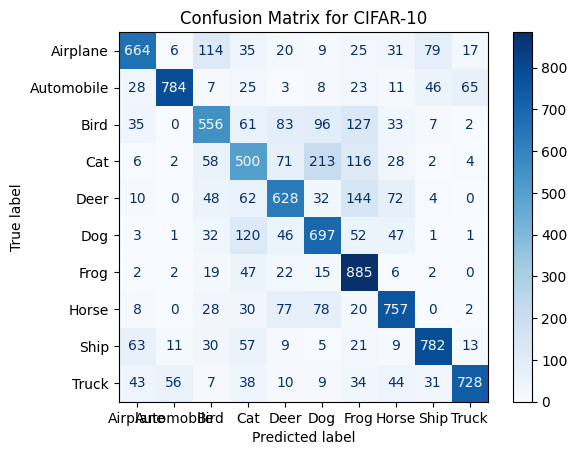

In [ ]:
# Predict on the test set
y_pred = cifar10_cnn.predict(x_test_cifar) # Change x_test to x_test_cifar
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()
y_test = y_test_cifar.flatten()  # Change y_test to y_test_cifar and flatten for compatibility

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[
    "Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"
])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for CIFAR-10")
plt.show()

**Evaluate CIFAR-10 model**

In [ ]:
cifar10_loss, cifar10_accuracy = cifar10_cnn.evaluate(x_test_cifar, y_test_cifar)
print(f"CIFAR-10 Test Accuracy: {cifar10_accuracy:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.7036 - loss: 0.8920
CIFAR-10 Test Accuracy: 0.70


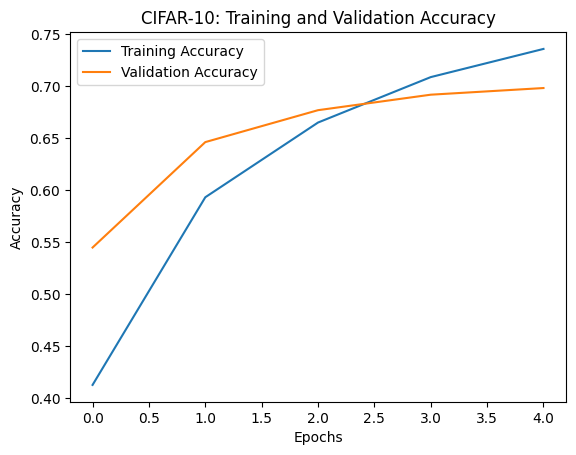

In [ ]:
plt.plot(History.history['accuracy'], label='Training Accuracy')
plt.plot(History.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CIFAR-10: Training and Validation Accuracy')
plt.show()

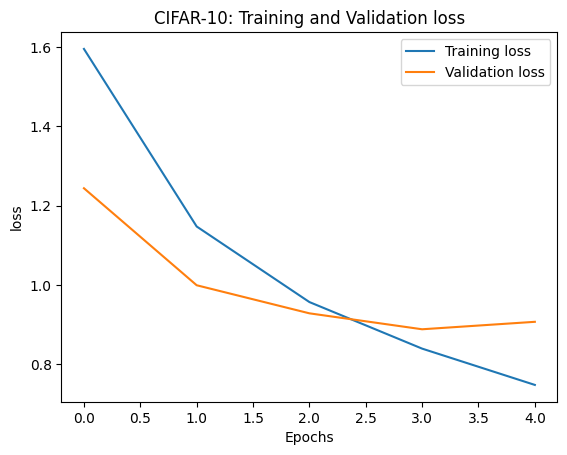

In [ ]:
plt.plot(History.history['loss'], label='Training loss')
plt.plot(History.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.title('CIFAR-10: Training and Validation loss')
plt.show()